In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# for practive, simulate data on a two dimensional plane
from sklearn.datasets import make_blobs
twoDData, cluster_true = make_blobs(n_samples = 300, 
                                    centers = 4,
                                   cluster_std = 0.50,
                                   random_state = 0)
print("Here are the first 10 rows of twoDData")
print(twoDData[:10])
print("Here are the true labels for each true labels for each observation. We can use this for validation if need be!")
print(cluster_true[:10])

Here are the first 10 rows of twoDData
[[ 1.03992529  1.92991009]
 [-1.38609104  7.48059603]
 [ 1.12538917  4.96698028]
 [-1.05688956  7.81833888]
 [ 1.4020041   1.726729  ]
 [ 3.20722587  0.36765575]
 [-1.76133611  1.81716162]
 [ 1.34081536  4.36827878]
 [-0.37881944  8.33265721]
 [-0.80062564  8.52294205]]
Here are the true labels for each true labels for each observation. We can use this for validation if need be!
[1 3 0 3 1 1 2 0 3 3]


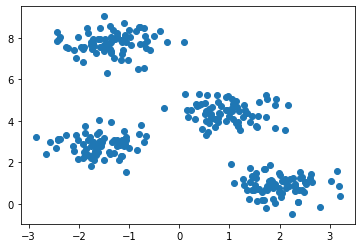

In [3]:
plt.scatter(twoDData[:,0], twoDData[:,1])

In [4]:
# Use k-means algorithm to figure out the clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans.fit(twoDData)
cluster_kmeans = kmeans.predict(twoDData)

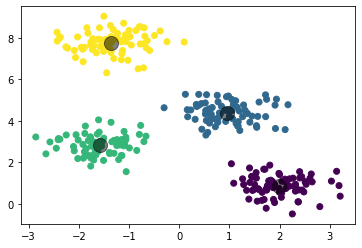

In [6]:
# Create a scatter plot colorcoded by the predicted clusters
plt.scatter(twoDData[:,0], 
            twoDData[:,1], 
            c = cluster_kmeans, 
            cmap = 'viridis')

# Plot the center of each cluster to the above scatter plot
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],
            centers[:,1],
            c = 'black',
            s = 200,
            alpha = 0.5)

In [7]:
# Find the silhouette score of the labeled data
from sklearn.metrics import silhouette_score
silhouetteScore = silhouette_score(twoDData, cluster_kmeans, metric = 'euclidean')
print(f'Silhouetter Score: {silhouetteScore}')

Silhouetter Score: 0.7356713838266389


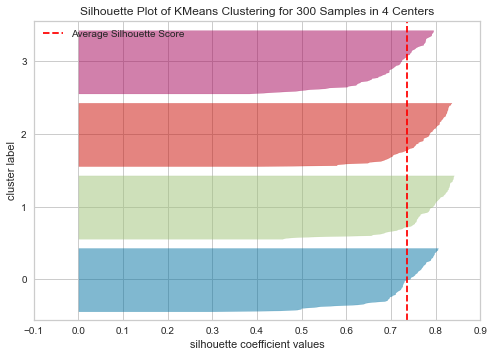

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 300 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [13]:
# Visualize the created silhouette score using the yellowbrick package
from yellowbrick.cluster import SilhouetteVisualizer
smodel = KMeans(n_clusters = 4)
visualizer = SilhouetteVisualizer(smodel, colors = 'yellowbrick')
visualizer.fit(twoDData)
visualizer.show()

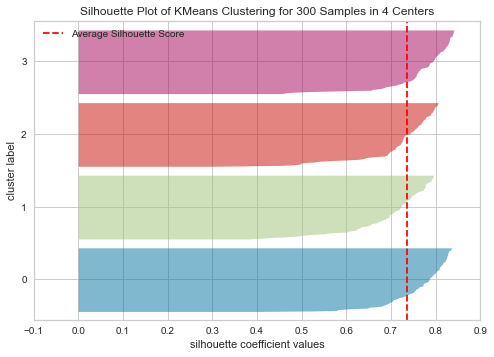

dict_keys(['ax', 'colors', 'estimator', 'is_fitted']) 


dict_keys(['ax', 'colors', 'estimator', 'is_fitted']) 




SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 300 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick', estimator=KMeans(n_clusters=4))

In [11]:
# Us the quick method silhouette_visualizer
from yellowbrick.cluster import silhouette_visualizer
silhouette_visualizer(kmeans, twoDData, colors = 'yellowbrick')

In [14]:
# Look at data on student's self-reported motivation
motivation = pd.read_csv('Downloads/ICE5_Data.csv')
motivation.head()

,id,motivation1,motivation2,motivation3,motivation4,motivation5
0,10005216,2,2.0,2,2.0,2.0
1,10033216,3,NaN,3,NaN,NaN
2,10004216,1,2.0,1,2.0,2.0
3,10008216,1,2.0,1,2.0,NaN
4,10026216,3,NaN,3,NaN,NaN


In [15]:
# Clean data
## Remove id variable
## Remove NA values, as k-means cannot deal with partial data
motivation_full = motivation.dropna()
dt = motivation_full.drop(['id'], axis = 1)

In [20]:
# Try dividing the data into two clusters
motivationkmeans2 = KMeans(n_clusters = 2)
motivationkmeans2.fit(dt)
cluster_motivation2 = motivationkmeans2.predict(dt)

[1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1]


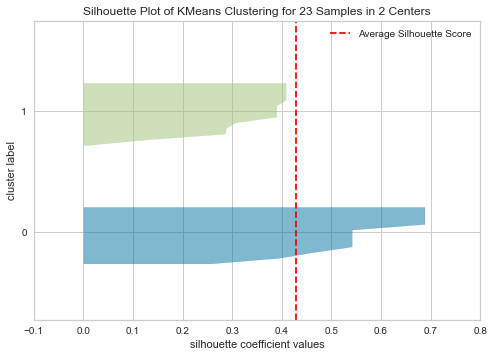

Silhouetter Score: 0.4278253443934091


In [21]:
silhouette_visualizer(motivationkmeans2, dt, colors = 'yellowbrick')
silhouetteScore2 = silhouette_score(dt, cluster_motivation2, metric = 'euclidean')
print(f"Silhouetter Score: {silhouetteScore2}")

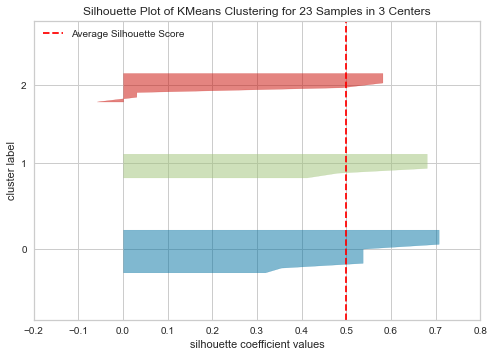

Silhouetter Score: 0.4995840033521631


In [22]:
# Try three clusters
motivationkmeans3 = KMeans(n_clusters = 3)
motivationkmeans3.fit(dt)
cluster_motivation3 = motivationkmeans3.predict(dt)
silhouette_visualizer(motivationkmeans3, dt, colors = 'yellowbrick')
silhouetteScore3 = silhouette_score(dt, cluster_motivation3, metric = 'euclidean')
print(f"Silhouetter Score: {silhouetteScore3}")

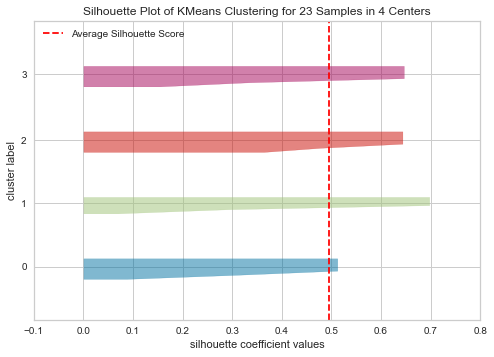

Silhouetter Score: 0.49488453159748896


In [26]:
# Try four clusters
motivationkmeans4 = KMeans(n_clusters = 4)
motivationkmeans4.fit(dt)
cluster_motivation4 = motivationkmeans4.predict(dt)
silhouette_visualizer(motivationkmeans4, dt, colors = 'yellowbrick')
silhouetteScore4 = silhouette_score(dt, cluster_motivation4, metric = 'euclidean')
print(f"Silhouetter Score: {silhouetteScore4}")

In [28]:
# create a dataframe to contain the clustering result
motivation3cluster = dt.copy(deep = True)
motivation3cluster['cluster'] = cluster_motivation3
motivation3cluster

,motivation1,motivation2,motivation3,motivation4,motivation5,cluster
0,2,2.0,2,2.0,2.0,1
2,1,2.0,1,2.0,2.0,2
6,2,2.0,2,2.0,2.0,1
9,2,2.0,2,2.0,2.0,1
11,2,1.0,2,1.0,2.0,2
13,2,3.0,2,3.0,1.0,1
14,1,1.0,1,1.0,4.0,0
16,1,1.0,1,1.0,3.0,2
17,1,1.0,1,1.0,1.0,2
18,1,1.0,1,1.0,1.0,2
